In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [3]:
type(model)

sklearn.linear_model._base.LinearRegression

In [4]:
#Cargar archivo csv desde seaborn
df= pd.read_csv('Mexico_Shared_Room.csv')
df.head(2)

,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,48,https://www.airbnb.com/rooms/281134,2024-09-26,Amazing Pent House apartment in the heart fo C...,https://www.airbnb.com/users/show/196253,2010-08-09,within an hour,100%,93%,t,...,5.0,5.0,5.00,5.00,8.0,4.0,1.0,0.0,0.06,3
1,62,https://www.airbnb.com/rooms/1565220,2024-09-26,"Beautiful, spacious and calm independent Suite...",https://www.airbnb.com/users/show/2518152,2012-06-01,within an hour,100%,92%,t,...,5.0,5.0,4.96,4.93,7.0,1.0,4.0,0.0,0.21,3


<Axes: xlabel='host_acceptance_rate', ylabel='price'>

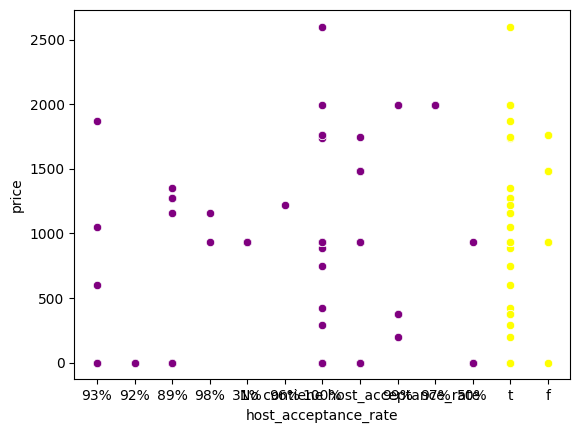

In [5]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_acceptance_rate"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='yellow',data=df)

In [6]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_acceptance_rate']]
Var_Dep = df['price']

In [7]:
# Reemplazar valores faltantes y convertir a número
df["host_acceptance_rate"] = df["host_acceptance_rate"].astype(str)  # Convertir todo a string
df["host_acceptance_rate"] = df["host_acceptance_rate"].replace("No contiene host_acceptance_rate", "0%")
df["host_acceptance_rate"] = df["host_acceptance_rate"].str.rstrip("%").astype(float) / 100  # Eliminar "%" y convertir a float

# Verificar que ahora sean valores numéricos
print(df["host_acceptance_rate"].dtype)  # Debe ser float

# Asegurar que las variables independientes sean numéricas
Vars_Indep = df[["host_acceptance_rate"]]  # Agregar otras variables aquí
Var_Dep = df["price"]  # Variable dependiente

# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

float64


LinearRegression()

In [8]:
#model.__dict__ se utiliza para ver los atributos del modelo
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_acceptance_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-227.75571028]),
 'rank_': 1,
 'singular_': array([5.03591295]),
 'intercept_': np.float64(924.1231683867433)}

In [9]:
#Predecimos los valores del total de la variable independiente
y_predic = model.predict(X = df[['host_acceptance_rate']])
y_predic

array([712.31035782, 714.58791493, 714.58791493, 712.31035782,
       721.42058623, 721.42058623, 721.42058623, 721.42058623,
       700.92257231, 853.5188982 , 705.47768651, 700.92257231,
       853.5188982 , 853.5188982 , 696.3674581 , 696.3674581 ,
       721.42058623, 853.5188982 , 696.3674581 , 924.12316839,
       698.64501521, 703.20012941, 696.3674581 , 698.64501521,
       703.20012941, 696.3674581 , 721.42058623, 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 712.31035782, 696.3674581 , 703.20012941,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 696.3674581 , 712.31035782, 721.42058623,
       924.12316839, 696.3674581 , 712.31035782, 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.3674581 ,
       696.3674581 , 696.3674581 , 696.3674581 , 696.36

In [10]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones', y_predic)
df

,Predicciones,Unnamed: 0,listing_url,last_scraped,description,host_url,host_since,host_response_time,host_response_rate,host_acceptance_rate,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,room_type_encoded
0,712.310358,48,https://www.airbnb.com/rooms/281134,2024-09-26,Amazing Pent House apartment in the heart fo C...,https://www.airbnb.com/users/show/196253,2010-08-09,within an hour,100%,0.93,...,5.00,5.00,5.00,5.00,8.0,4.0,1.0,0.0,0.06,3
1,714.587915,62,https://www.airbnb.com/rooms/1565220,2024-09-26,"Beautiful, spacious and calm independent Suite...",https://www.airbnb.com/users/show/2518152,2012-06-01,within an hour,100%,0.92,...,5.00,5.00,4.96,4.93,7.0,1.0,4.0,0.0,0.21,3
2,714.587915,75,https://www.airbnb.com/rooms/1736063,2024-09-26,"Small, very practical and beautiful independen...",https://www.airbnb.com/users/show/2518152,2012-06-01,within an hour,100%,0.92,...,4.97,4.89,4.93,4.96,7.0,1.0,4.0,0.0,0.45,3
3,712.310358,100,https://www.airbnb.com/rooms/571166,2024-09-26,This is a one bedroom furnished apartment in t...,https://www.airbnb.com/users/show/196253,2010-08-09,within an hour,100%,0.93,...,5.00,5.00,4.92,5.00,8.0,4.0,1.0,0.0,0.01,3
4,721.420586,135,https://www.airbnb.com/rooms/737328,2024-09-26,No contiene descripción,https://www.airbnb.com/users/show/3850198,2012-10-12,within an hour,100%,0.89,...,4.84,5.00,5.00,4.84,11.0,7.0,0.0,0.0,0.18,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,924.123168,24907,https://www.airbnb.com/rooms/1191430079828817253,2024-09-26,Stay in the heart of Mexico City and be near t...,https://www.airbnb.com/users/show/547380140,2023-11-20,within an hour,100%,0.00,...,4.76,4.84,4.83,4.85,22.0,0.0,0.0,0.0,1.74,3
121,924.123168,24908,https://www.airbnb.com/rooms/1191430130484570539,2024-09-26,Stay in the heart of Mexico City and be near t...,https://www.airbnb.com/users/show/547380140,2023-11-20,within an hour,100%,0.00,...,4.76,4.84,4.83,4.85,22.0,0.0,0.0,0.0,1.74,3
122,924.123168,24909,https://www.airbnb.com/rooms/1191430238014754309,2024-09-26,Stay in the heart of Mexico City and be near t...,https://www.airbnb.com/users/show/547380140,2023-11-20,within an hour,100%,0.00,...,4.76,4.84,4.83,4.85,22.0,0.0,0.0,0.0,1.74,3
123,924.123168,24910,https://www.airbnb.com/rooms/1191430521084135024,2024-09-26,Stay in the heart of Mexico City and be near t...,https://www.airbnb.com/users/show/547380140,2023-11-20,within an hour,100%,0.00,...,4.76,4.84,4.83,4.85,22.0,0.0,0.0,0.0,1.74,3


In [11]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.027848585410072513

In [12]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.16687895436534983)

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

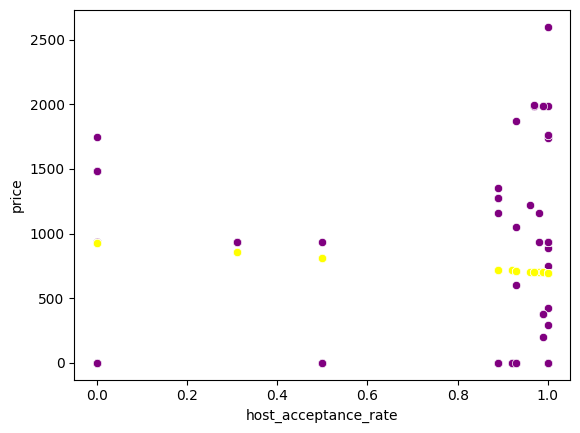

In [13]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_acceptance_rate',y='price',color='purple',data = df)
sns.scatterplot(x='host_acceptance_rate',y='Predicciones',color='yellow',data = df)

In [14]:
#En esta linea de código se trandforman los valores de las variables categóricas a numéricas
df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})

C:\Users\cesar\AppData\Local\Temp\ipykernel_22984\827320779.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']] = df[['host_is_superhost', 'host_identity_verified', 'instant_bookable']].replace({'t': 1, 'f': 0})


In [15]:
df['room_type'] = 1

In [16]:
df = df[['price', 'host_is_superhost', 'host_acceptance_rate', 'room_type', 
         'accommodates', 'bathrooms', 'review_scores_cleanliness', 
         'host_identity_verified', 'instant_bookable']]

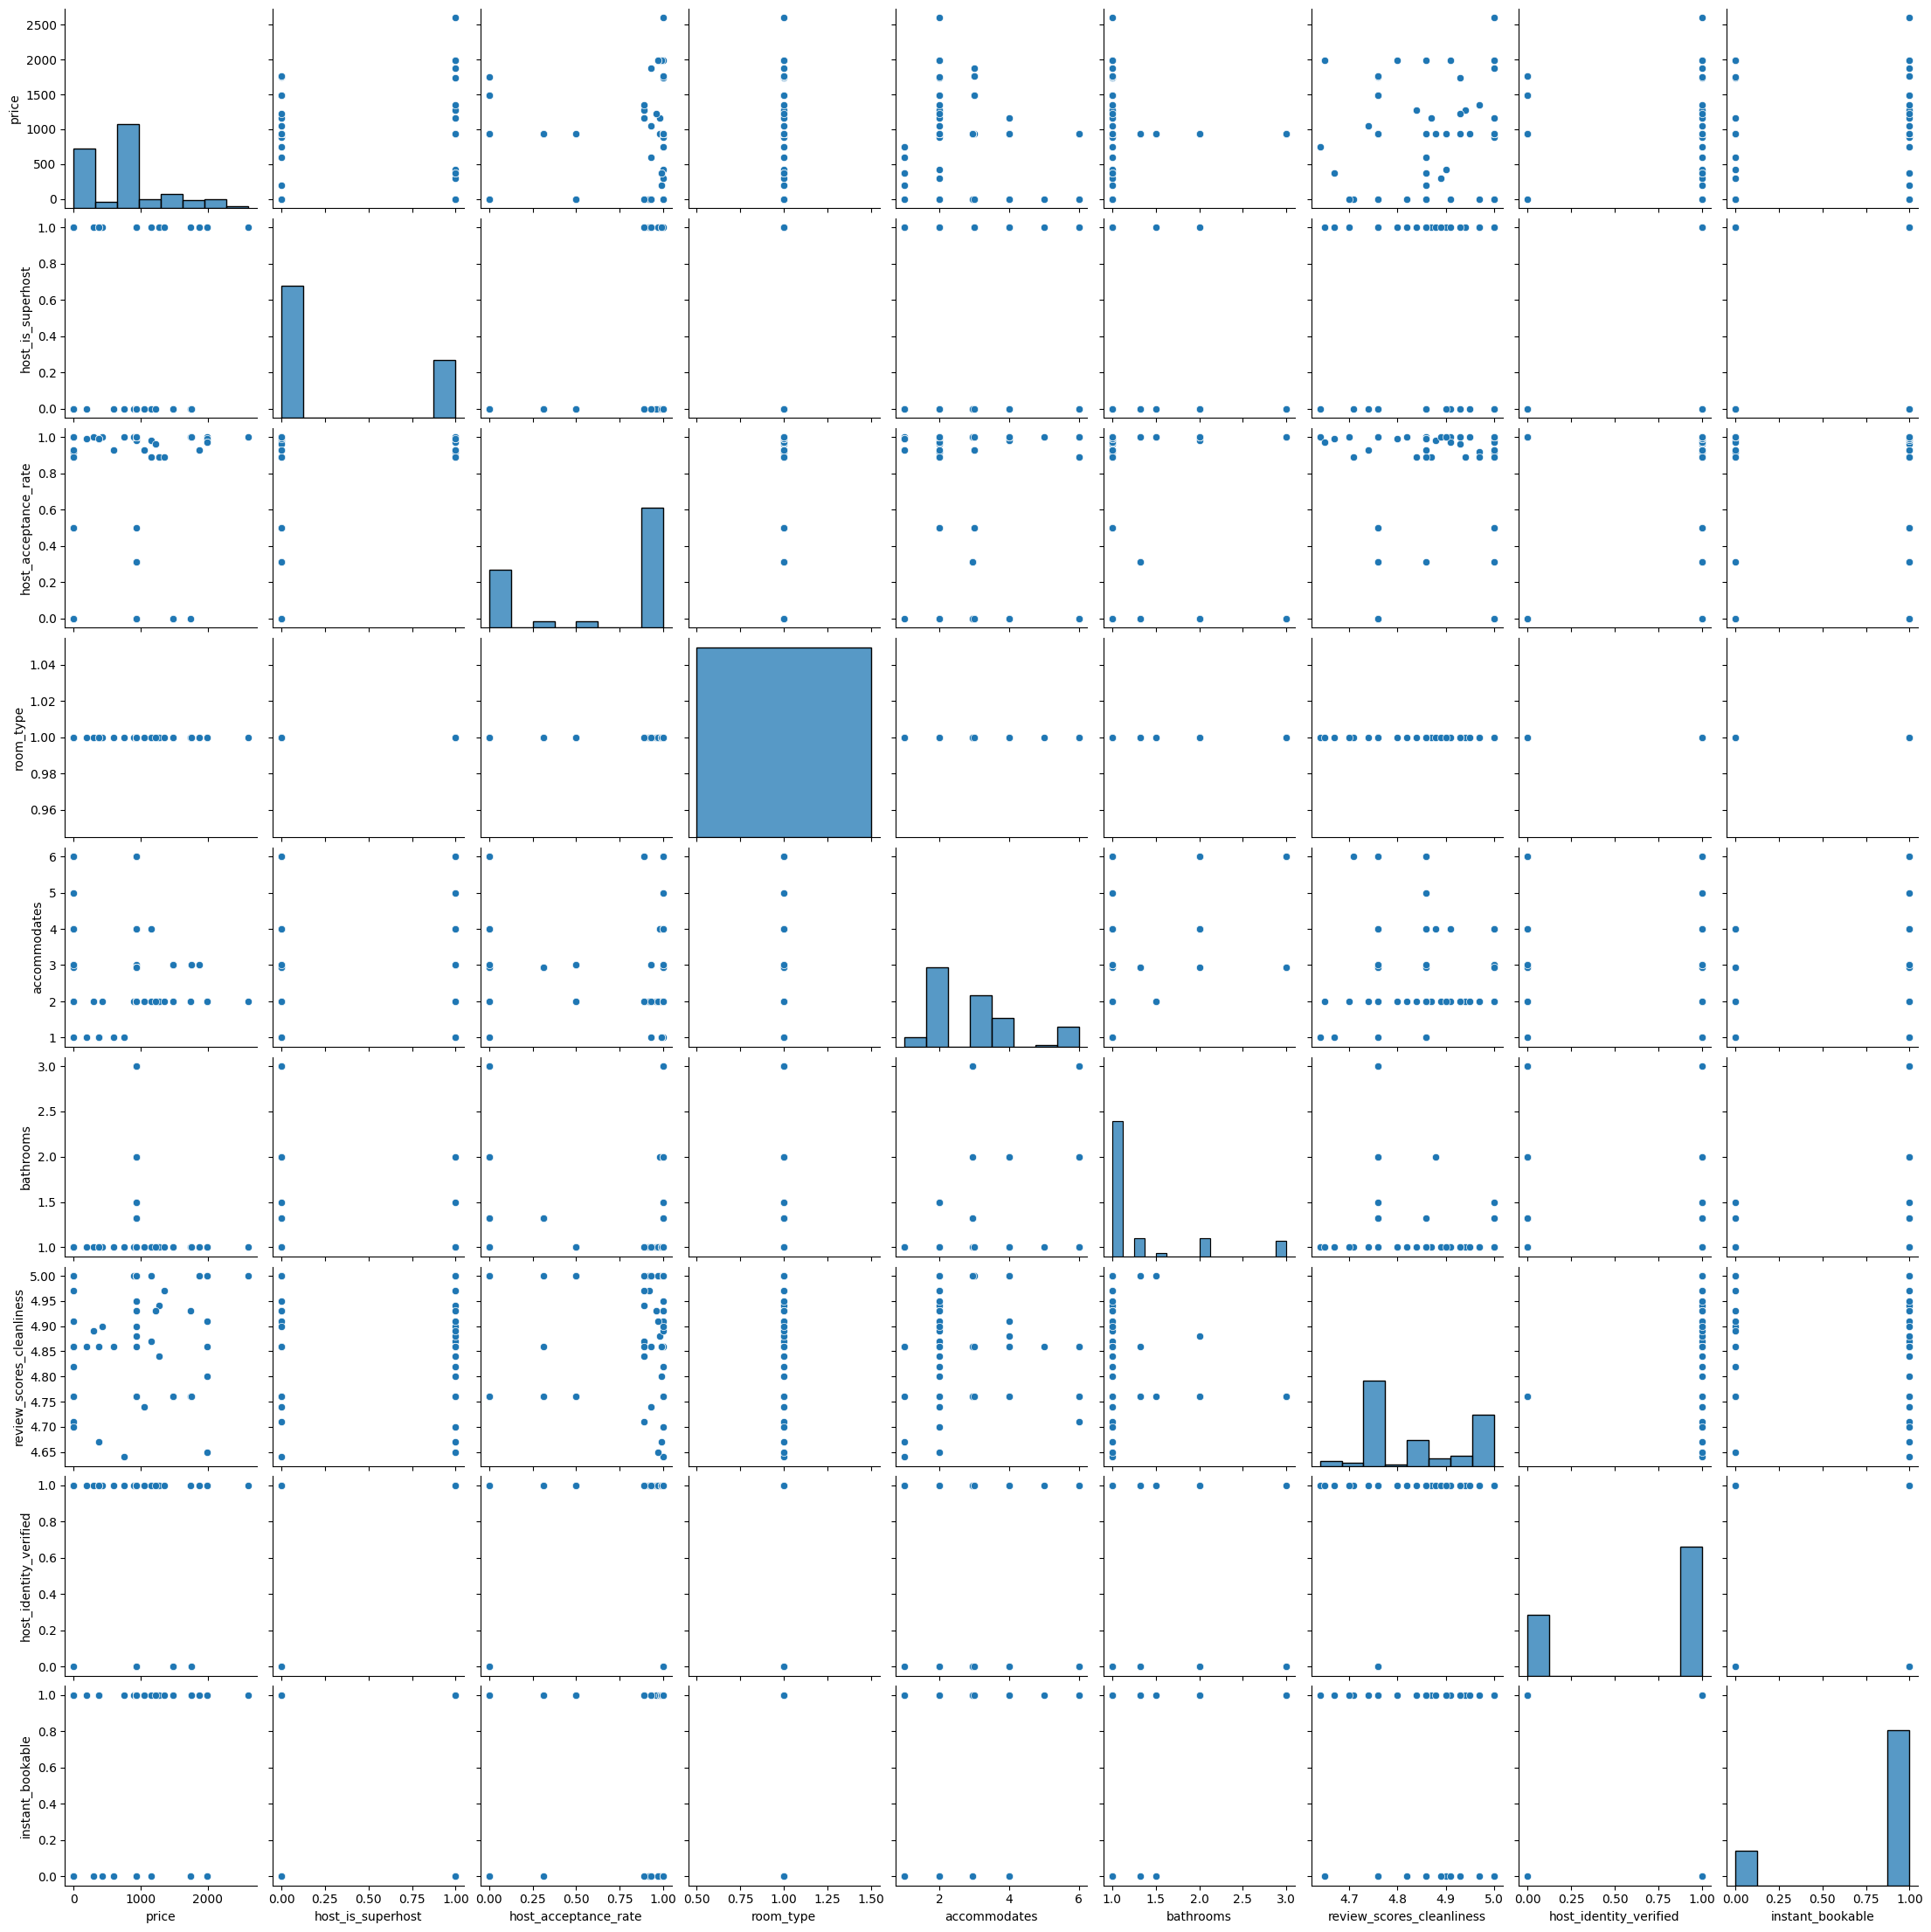

In [17]:
#Graficamos todas las disperciones
sns.pairplot(df)

In [18]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors = df.corr()
Corr_Factors

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,-0.084197,-0.166879,NaN,-0.140011,0.127452,-0.217300,-0.317026,0.069886
host_is_superhost,-0.084197,1.000000,0.482462,NaN,-0.138379,-0.288047,0.259305,0.453370,-0.224781
host_acceptance_rate,-0.166879,0.482462,1.000000,NaN,-0.252245,-0.387553,0.383090,0.717207,-0.091849
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,-0.140011,-0.138379,-0.252245,NaN,1.000000,0.548105,-0.218107,-0.352701,0.222866
bathrooms,0.127452,-0.288047,-0.387553,NaN,0.548105,1.000000,-0.376158,-0.540327,0.210063
review_scores_cleanliness,-0.217300,0.259305,0.383090,NaN,-0.218107,-0.376158,1.000000,0.573643,-0.278402
host_identity_verified,-0.317026,0.453370,0.717207,NaN,-0.352701,-0.540327,0.573643,1.000000,-0.281490
instant_bookable,0.069886,-0.224781,-0.091849,NaN,0.222866,0.210063,-0.278402,-0.281490,1.000000


In [19]:
#Encontramos el valor absoluto de las todas correlaciones
Corr_Factors1 = abs(Corr_Factors)
Corr_Factors1

,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
price,1.000000,0.084197,0.166879,NaN,0.140011,0.127452,0.217300,0.317026,0.069886
host_is_superhost,0.084197,1.000000,0.482462,NaN,0.138379,0.288047,0.259305,0.453370,0.224781
host_acceptance_rate,0.166879,0.482462,1.000000,NaN,0.252245,0.387553,0.383090,0.717207,0.091849
room_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,0.140011,0.138379,0.252245,NaN,1.000000,0.548105,0.218107,0.352701,0.222866
bathrooms,0.127452,0.288047,0.387553,NaN,0.548105,1.000000,0.376158,0.540327,0.210063
review_scores_cleanliness,0.217300,0.259305,0.383090,NaN,0.218107,0.376158,1.000000,0.573643,0.278402
host_identity_verified,0.317026,0.453370,0.717207,NaN,0.352701,0.540327,0.573643,1.000000,0.281490
instant_bookable,0.069886,0.224781,0.091849,NaN,0.222866,0.210063,0.278402,0.281490,1.000000


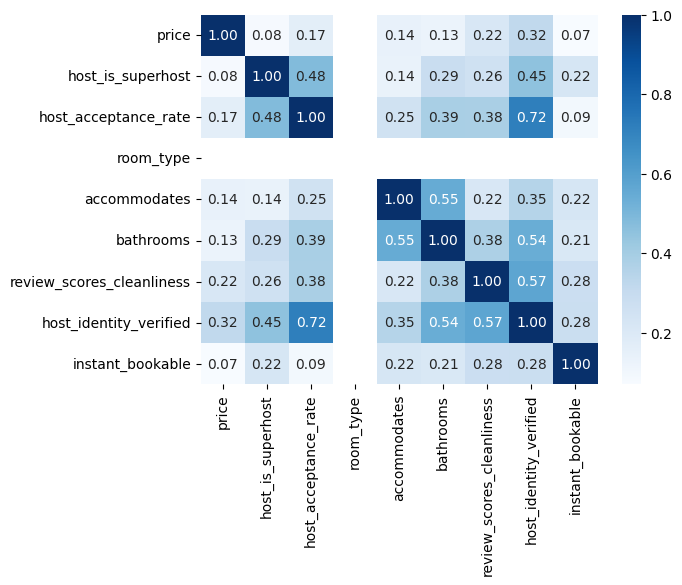

In [20]:
#Ajustamos el mapa de calor de los coeficientes de correlación
Heat_Map = sns.heatmap(Corr_Factors1, cmap = 'Blues', annot=True, fmt=".2f")

Price Vs Host is Superhost

<Axes: xlabel='host_is_superhost', ylabel='price'>

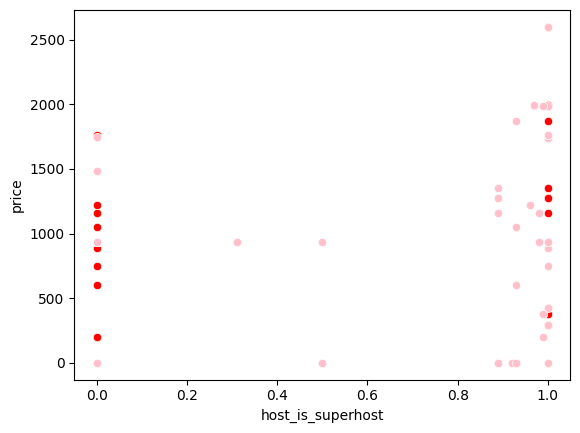

In [21]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "host_is_superhost"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_is_superhost',y='price',color='red',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='pink',data=df)

In [22]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_is_superhost']]
Var_Dep = df['price']

In [23]:
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [24]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-112.52365396]),
 'rank_': 1,
 'singular_': array([5.1427619]),
 'intercept_': np.float64(811.2183908045976)}

In [25]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.00708906000042675

In [26]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_is_superhost']])
y_predic

array([698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       811.2183908 , 811.2183908 , 811.2183908 , 698.69473684,
       811.2183908 , 811.2183908 , 698.69473684, 811.2183908 ,
       811.2183908 , 811.2183908 , 811.2183908 , 811.2183908 ,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 698.69473684, 811.2183908 , 698.69473684,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 698.69473684, 698.69473684, 698.69473684,
       698.69473684, 811.2183908 , 698.69473684, 698.69473684,
       811.2183908 , 698.69473684, 811.2183908 , 811.2183908 ,
       811.2183908 , 698.69473684, 811.2183908 , 811.2183908 ,
       811.2183908 , 811.2183908 , 698.69473684, 811.2183908 ,
       811.2183908 , 811.2183908 , 811.2183908 , 811.2183908 ,
       811.2183908 , 811.2183908 , 811.2183908 , 811.21

In [27]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones1', y_predic)
df

,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,698.694737,0.0,1,0.93,1,3.00,1.00,5.00,1,1
1,698.694737,0.0,1,0.92,1,2.00,1.00,5.00,1,0
2,698.694737,0.0,1,0.92,1,2.00,1.00,4.97,1,0
3,698.694737,1872.0,1,0.93,1,3.00,1.00,5.00,1,1
4,698.694737,1275.0,1,0.89,1,2.00,1.00,4.84,1,1
...,...,...,...,...,...,...,...,...,...,...
120,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
121,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
122,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
123,811.218391,1484.0,0,0.00,1,2.00,1.00,4.76,0,1


In [28]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.00708906000042675

In [29]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.08419655575156712)

<Axes: xlabel='host_is_superhost', ylabel='price'>

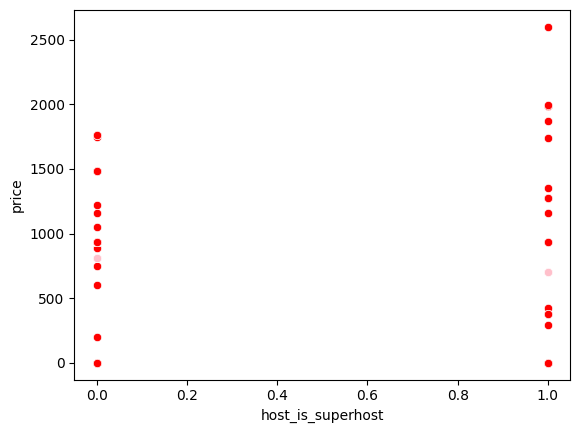

In [30]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_is_superhost',y='price',color='red',data = df)
sns.scatterplot(x='host_is_superhost',y='Predicciones1',color='pink',data = df)

Accomodates Vs Bathrooms

<Axes: xlabel='bathrooms', ylabel='price'>

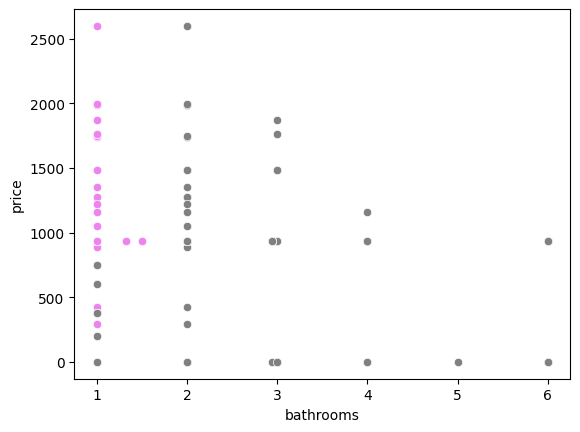

In [31]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "bathrooms"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='bathrooms',y='price',color='violet',data=df)
sns.scatterplot(x='accommodates',y='price',color='grey',data=df)

In [32]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['bathrooms']]
Var_Dep = df['price']

In [33]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [34]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([133.7858511]),
 'rank_': 1,
 'singular_': array([6.54761905]),
 'intercept_': np.float64(603.7959828580206)}

In [35]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.01624408829888957

In [36]:
y_predic = model.predict(X = df[['bathrooms']])
y_predic

array([ 737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  780.39330632,  737.58183396,  871.36768507,
        780.39330632,  780.39330632,  737.58183396,  737.58183396,
        737.58183396,  780.39330632,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  804.47475951,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  737.58183396,
        737.58183396,  737.58183396,  737.58183396,  804.47475

In [37]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones2', y_predic)

<Axes: xlabel='bathrooms', ylabel='price'>

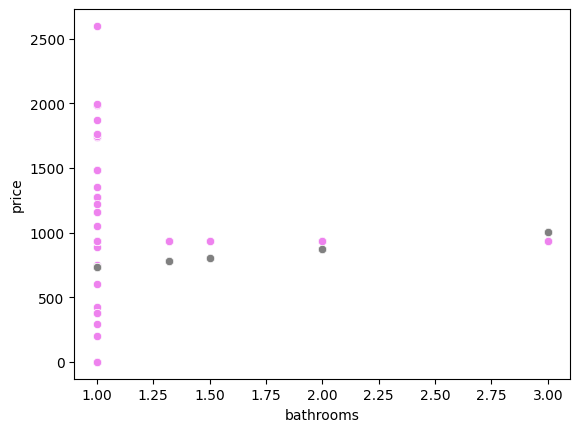

In [38]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='bathrooms',y='price',color='violet',data = df)
sns.scatterplot(x='bathrooms',y='Predicciones2',color='gray',data = df)

In [39]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.01624408829888957

In [40]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.1274522981310638)

Review_scores_cleanliness vs price

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

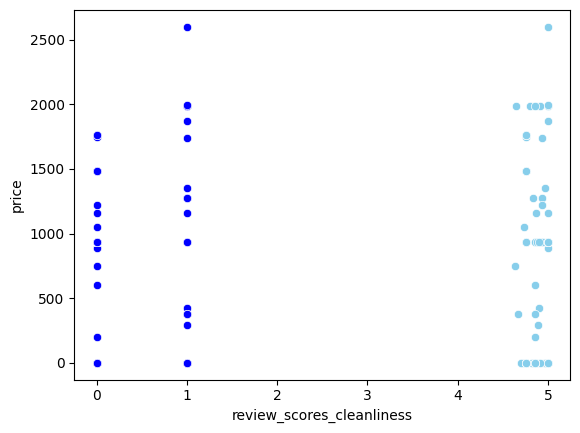

In [41]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data=df)
sns.scatterplot(x='host_is_superhost',y='price',color='blue',data=df)

In [42]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['review_scores_cleanliness']]
Var_Dep = df['price']

In [43]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [44]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-1252.29686709]),
 'rank_': 1,
 'singular_': array([1.19261058]),
 'intercept_': np.float64(6849.64916789471)}

In [45]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.04721935691111834

In [46]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['review_scores_cleanliness']])
y_predic

array([ 588.16483244,  588.16483244,  625.73373846,  588.16483244,
        788.53233118,  663.30264447,  750.96342516,  625.73373846,
        588.16483244,  763.48639384,  675.82561314,  738.44045649,
        888.71608054,  588.16483244,  713.39451915, 1038.9917046 ,
        951.3309239 ,  888.71608054,  700.87155048,  588.16483244,
        838.62420586,  700.87155048,  588.16483244,  763.48639384,
       1026.46873592,  813.57826852,  763.48639384,  675.82561314,
        725.91748782,  763.48639384,  763.48639384,  588.16483244,
        588.16483244,  588.16483244,  763.48639384,  763.48639384,
        763.48639384,  763.48639384,  763.48639384,  763.48639384,
        963.85389257,  763.48639384,  588.16483244,  588.16483244,
        588.16483244,  888.71608054,  588.16483244,  588.16483244,
        588.16483244,  888.71608054,  913.76201789,  588.16483244,
        888.71608054,  588.16483244,  588.16483244,  588.16483244,
        588.16483244,  650.7796758 ,  675.82561314,  588.16483

In [47]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones3', y_predic)

<Axes: xlabel='review_scores_cleanliness', ylabel='price'>

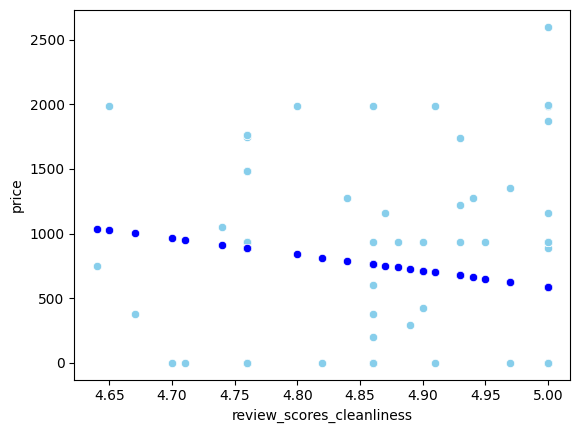

In [48]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='review_scores_cleanliness',y='price',color='skyblue',data = df)
sns.scatterplot(x='review_scores_cleanliness',y='Predicciones3',color='blue',data = df)

In [49]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.04721935691111834

In [50]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.21730015396018093)

price vs host identity verified

<Axes: xlabel='host_identity_verified', ylabel='price'>

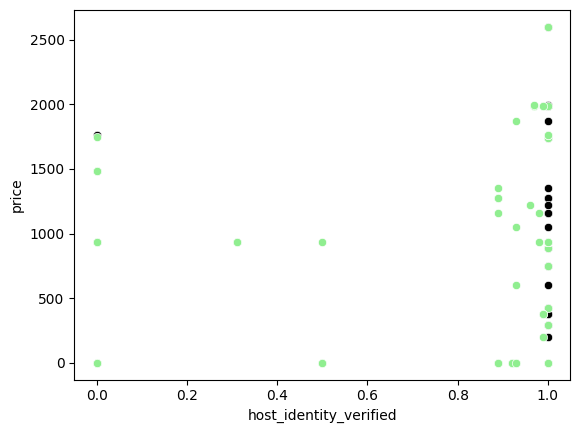

In [51]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "alcohol"
#Para observar el comportamiento en su disperción
from turtle import color
sns.scatterplot(x='host_identity_verified',y='price',color='black',data=df)
sns.scatterplot(x='host_acceptance_rate',y='price',color='lightgreen',data=df)

In [52]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['host_identity_verified']]
Var_Dep = df['price']

In [53]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [54]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-417.78867647]),
 'rank_': 1,
 'singular_': array([5.21536192]),
 'intercept_': np.float64(1061.1075)}

In [55]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.10050563152161629

In [56]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['host_identity_verified']])
y_predic

array([ 643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882353,
       1061.1075    ,  643.31882353,  643.31882353,  643.31882353,
        643.31882353,  643.31882353,  643.31882353,  643.31882

In [57]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones4', y_predic)
df

,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,643.318824,588.164832,737.581834,698.694737,0.0,1,0.93,1,3.00,1.00,5.00,1,1
1,643.318824,588.164832,737.581834,698.694737,0.0,1,0.92,1,2.00,1.00,5.00,1,0
2,643.318824,625.733738,737.581834,698.694737,0.0,1,0.92,1,2.00,1.00,4.97,1,0
3,643.318824,588.164832,737.581834,698.694737,1872.0,1,0.93,1,3.00,1.00,5.00,1,1
4,643.318824,788.532331,737.581834,698.694737,1275.0,1,0.89,1,2.00,1.00,4.84,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1061.107500,888.716081,780.393306,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
121,1061.107500,888.716081,780.393306,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
122,1061.107500,888.716081,780.393306,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
123,1061.107500,888.716081,737.581834,811.218391,1484.0,0,0.00,1,2.00,1.00,4.76,0,1


<Axes: xlabel='host_identity_verified', ylabel='price'>

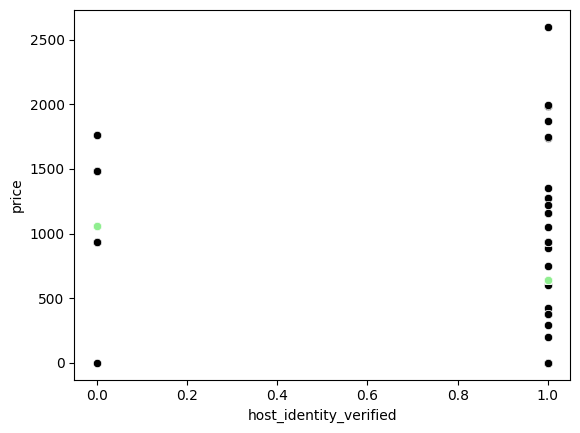

In [58]:
#Visualizamos la tabla comparativa entre el total real y el total predecido
sns.scatterplot(x='host_identity_verified',y='price',color='black',data = df)
sns.scatterplot(x='host_identity_verified',y='Predicciones4',color='lightgreen',data = df)

In [59]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.10050563152161629

In [60]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.31702623159861126)

price vs instant bookable

<Axes: xlabel='instant_bookable', ylabel='price'>

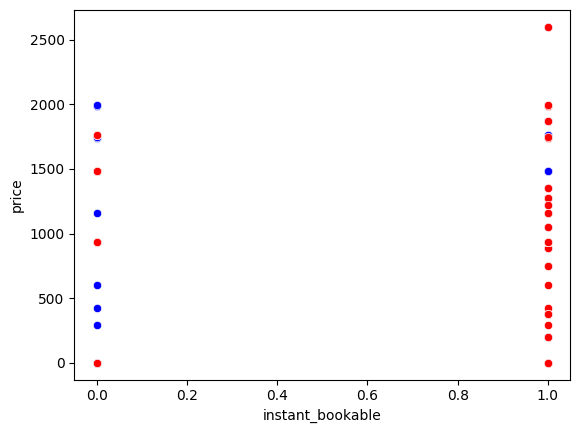

In [61]:
#Imprimimos el scatter plot entre la variable dependiente "price" e independiente "instant_bookable"
from turtle import color
sns.scatterplot(x='instant_bookable',y='price',color='blue',data=df)
sns.scatterplot(x='host_identity_verified',y='price',color='red',data=df)

In [62]:
#Declaramos variables dependientes e independientes para la regresión lineal
Vars_Indep = df[['instant_bookable']]
Var_Dep = df['price']

In [63]:
# Ajustar el modelo
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [64]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([110.87263427]),
 'rank_': 1,
 'singular_': array([4.33220498]),
 'intercept_': np.float64(686.5391304347825)}

In [65]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep, Var_Dep)

0.004883991395986054

In [66]:
#Predecimos los valores del total de accidentes a partir de la variable "alcohol" 
y_predic = model.predict(X = df[['instant_bookable']])
y_predic

array([797.41176471, 686.53913043, 686.53913043, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       686.53913043, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 686.53913043, 686.53913043, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 686.53913043, 686.53913043, 797.41176471,
       686.53913043, 686.53913043, 797.41176471, 686.53913043,
       686.53913043, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 686.53913043, 797.41176471, 686.53913043,
       797.41176471, 686.53913043, 797.41176471, 797.41176471,
       686.53913043, 686.53913043, 797.41176471, 686.53913043,
       686.53913043, 797.41176471, 797.41176471, 686.53913043,
       797.41176471, 797.41176471, 797.41176471, 797.41176471,
       797.41176471, 797.41176471, 797.41176471, 797.41

In [67]:
#Insertamos Predicciones en el DataFrame
df.insert(0, 'Predicciones5', y_predic)
df

,Predicciones5,Predicciones4,Predicciones3,Predicciones2,Predicciones1,price,host_is_superhost,host_acceptance_rate,room_type,accommodates,bathrooms,review_scores_cleanliness,host_identity_verified,instant_bookable
0,797.411765,643.318824,588.164832,737.581834,698.694737,0.0,1,0.93,1,3.00,1.00,5.00,1,1
1,686.539130,643.318824,588.164832,737.581834,698.694737,0.0,1,0.92,1,2.00,1.00,5.00,1,0
2,686.539130,643.318824,625.733738,737.581834,698.694737,0.0,1,0.92,1,2.00,1.00,4.97,1,0
3,797.411765,643.318824,588.164832,737.581834,698.694737,1872.0,1,0.93,1,3.00,1.00,5.00,1,1
4,797.411765,643.318824,788.532331,737.581834,698.694737,1275.0,1,0.89,1,2.00,1.00,4.84,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,797.411765,1061.107500,888.716081,780.393306,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
121,797.411765,1061.107500,888.716081,780.393306,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
122,797.411765,1061.107500,888.716081,780.393306,811.218391,932.7,0,0.00,1,2.94,1.32,4.76,0,1
123,797.411765,1061.107500,888.716081,737.581834,811.218391,1484.0,0,0.00,1,2.00,1.00,4.76,0,1


<Axes: xlabel='instant_bookable', ylabel='price'>

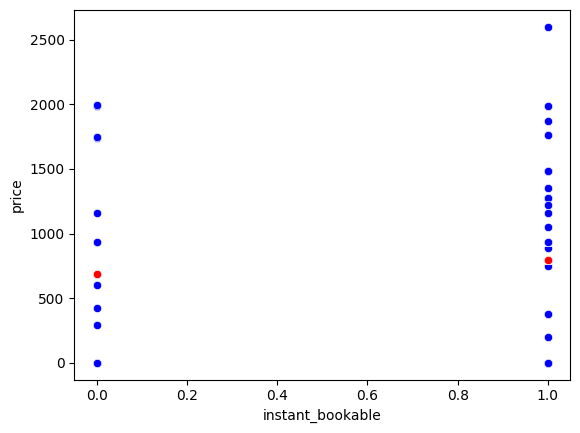

In [68]:
#Visualizamos la tabla comparativa entre el total real y el total predecido

sns.scatterplot(x='instant_bookable',y='price',color='blue',data = df)
sns.scatterplot(x='instant_bookable',y='Predicciones5',color='red',data = df)

In [69]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter = model.score(X = Vars_Indep, y = Var_Dep)
coef_Deter

0.004883991395986054

In [70]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

np.float64(0.06988555928077025)